# Q2. Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

 - Variable Name -  Variable Description 
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No;1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
 - Name	- Name
 - Sex - Sex
 - Age - Age
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin 
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

## Import Libraries
Import all necessary libraries


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay

import numpy as np
import warnings
warnings.filterwarnings("ignore")

Our target variable will be Survived.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [3]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

2. The resulting dataframe (I.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [4]:
df_train.shape

(712, 12)

3. In df_train, dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [5]:
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

4. Use the ‘pandas.isnull().sum()’ function check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [6]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

5. Use the ‘pandas.DataFrame.drop()’ function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [7]:
df_train.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

6. Use the ‘pandas.DataFrame.fillna()’ function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called `imputation` (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the ‘dropna()’ function to drop any remaining rows that consist of NA values.

In [8]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)

In [9]:
df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [14]:
df_train[df_train['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
125,1,female,38.0,0,0,80.0,NaN,1
679,1,female,62.0,0,0,80.0,NaN,1


In [15]:
df_train.dropna(inplace=True)

In [16]:
df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [17]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,29.811847,0,0,30.5000,S,1
1,3,female,27.000000,0,2,11.1333,S,1
2,2,male,29.811847,0,0,0.0000,S,0
3,3,female,9.000000,4,2,31.2750,S,0
4,1,female,48.000000,1,0,39.6000,C,1
...,...,...,...,...,...,...,...,...
707,3,male,19.000000,0,0,14.5000,S,0
708,2,male,18.000000,0,0,11.5000,S,0
709,1,male,17.000000,0,2,110.8833,C,1
710,3,male,28.500000,0,0,7.2292,C,0


In [18]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,2,50.000000,0,1,26.0000,0,0,1,1
1,1,44.000000,0,0,27.7208,0,0,0,1
2,3,29.236929,0,0,7.8792,0,1,0,1
3,3,5.000000,0,0,12.4750,0,0,1,1
4,2,21.000000,0,0,73.5000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
174,1,21.000000,0,0,77.9583,0,0,1,1
175,3,29.236929,0,0,8.4583,1,1,0,0
176,3,9.000000,0,2,20.5250,1,0,1,1
177,3,29.236929,0,0,7.0500,1,0,1,0


In [19]:
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']
X_test = df_test.drop(columns=['Survived'])
y_test = df_test['Survived']

#### ii. Data Visualization

1. Using matplotlib employ a scatter plot using ‘matplotlib.pyplot.scatter’ between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title.

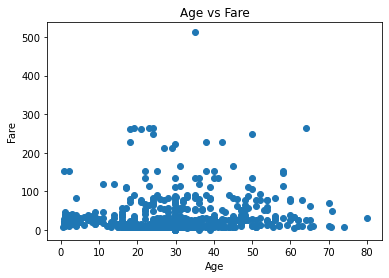

In [20]:
plt.scatter(df_train['Age'], df_train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()


2. **Only for this question** use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using ‘matplotlib.pyplot.bar’ (Passenger Class column). 

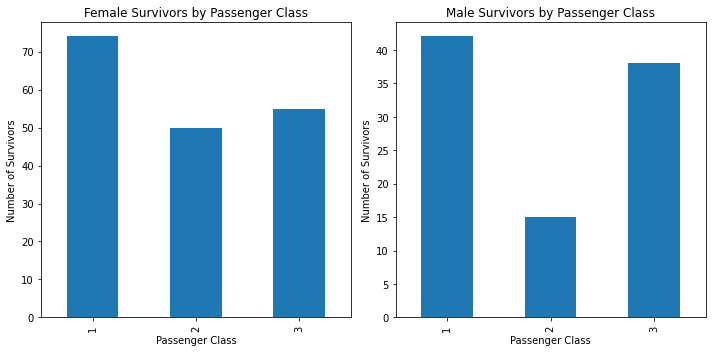

In [14]:
# create a pivot table to get the counts of male and female survivors by passenger class
survival_counts = df_train.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='sum')

# plot the counts of male and female survivors by passenger class on two separate bar charts
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
survival_counts.loc['female'].plot(kind='bar', ax=ax1)
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Number of Survivors')
ax1.set_title('Female Survivors by Passenger Class')
survival_counts.loc['male'].plot(kind='bar', ax=ax2)
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Number of Survivors')
ax2.set_title('Male Survivors by Passenger Class')
plt.tight_layout()
plt.show()

3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column. 

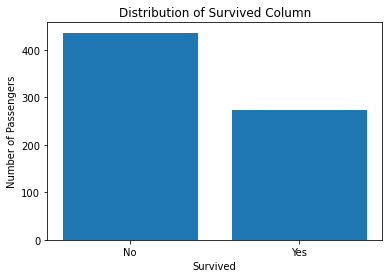

In [21]:
import matplotlib.pyplot as plt

# get value counts of 'Survived' column in y_train
survival_counts = y_train.value_counts()

# plot the counts of survived and non-survived passengers
plt.bar(survival_counts.index, survival_counts.values)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Survived Column')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train store the result back into X_train). 

In [22]:
# convert categorical data into dummy variables
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)

#### iii. Data Scaling

1. Employ X_train and MinMaxScaler only on the continuous attributes. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in X_train again. 

In [25]:
from sklearn.preprocessing import MinMaxScaler

# select only the continuous attributes
continuous_cols = ['Age', 'Fare']

# create a scaler object and apply it to the continuous attributes in X_train
scaler = MinMaxScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

In [26]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.369337,0,0,0.059532,1,0,1
1,3,0.334004,0,2,0.021731,0,0,1
2,2,0.369337,0,0,0.000000,1,0,1
3,3,0.107816,4,2,0.061045,0,0,1
4,1,0.597889,1,0,0.077294,0,0,0
...,...,...,...,...,...,...,...,...
707,3,0.233476,0,0,0.028302,1,0,1
708,2,0.220910,0,0,0.022447,1,0,1
709,1,0.208344,0,2,0.216430,1,0,0
710,3,0.352852,0,0,0.014110,1,0,0


2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [27]:
# select only the continuous attributes in X_test
X_test_continuous = X_test[['Age', 'Fare']]

# apply the transform method of the scaler to the continuous attributes in X_test
X_test_scaled = scaler.transform(X_test_continuous)

# replace the original continuous attributes in X_test with the scaled values
X_test[['Age', 'Fare']] = X_test_scaled

### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [28]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [29]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [30]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [31]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# print the accuracy of the model
print(f"The accuracy of the Logistic Regression model is: {accuracy_lr:.4f}")

The accuracy of the Logistic Regression model is: 0.8939


In [34]:
y_train_pred = model_lr.predict(X_train)
accuracy_lr = accuracy_score(y_train, y_train_pred)
accuracy_lr

0.7873239436619718

#### ii. Modelling (Model Instantiation / Training) using Support Vector Machine Classifier

1. Employ the Support Vector Machine (SVM) classifier from sklearn () and instantiate the model. Make sure to set `probability=True` when creating the model. Label this model as ‘model_svm’

In [25]:
model_svm = SVC(probability=True)

2. Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [26]:
model_svm.fit(X_train, y_train)

SVC(probability=True)

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [27]:
y_pred_svm = model_svm.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [28]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# print the accuracy of the model
print(f"The accuracy of the SVM model is: {accuracy_svm:.4f}")

The accuracy of the SVM model is: 0.8939


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the `model_lr` model and the `model_svm` along with a confusion matrix for each of them. 

In [29]:
# print classification report and confusion matrix for the logistic regression model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# print classification report and confusion matrix for the SVM model
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       113
           1       0.89      0.82      0.85        66

    accuracy                           0.89       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179

[[106   7]
 [ 12  54]]
SVM:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       113
           1       0.91      0.79      0.85        66

    accuracy                           0.89       179
   macro avg       0.90      0.87      0.88       179
weighted avg       0.90      0.89      0.89       179

[[108   5]
 [ 14  52]]


#### iii. Make a calibration plot for each of the models without noisy data (`model_lr`, `model_svm`).

Use the CalibrationDisplay class from sklearn.calibration to make your plot.

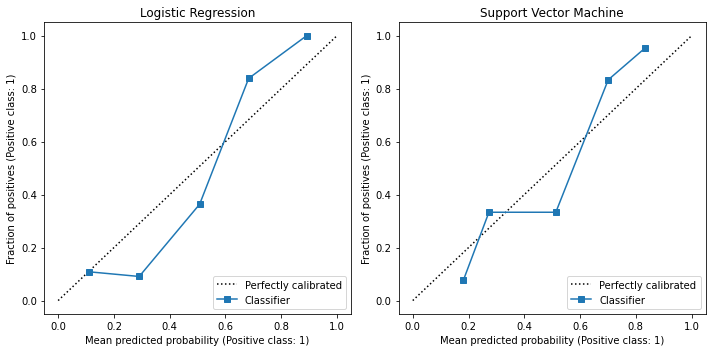

In [30]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibrationDisplay

# Get predicted probabilities for each model on the test data
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]
y_proba_svm = model_svm.predict_proba(X_test)[:, 1]

# Plot calibration curves for each model
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

CalibrationDisplay.from_predictions(y_test, y_proba_lr, ax=ax[0])
ax[0].set_title("Logistic Regression")

CalibrationDisplay.from_predictions(y_test, y_proba_svm, ax=ax[1])
ax[1].set_title("Support Vector Machine")

plt.tight_layout()
plt.show()
